In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import numpy as np
from EFBP import EFBPSim, minimize_squared_error

In [2]:
df = pd.read_csv("data/grid.csv")
df.head()

,strategies,memory,threshold,distribution,choice,crosses,std
0,18,2.0,6000.0,uniform,mse,False,4663.133520
1,10,2.0,6000.0,uniform,mse,False,4347.765122
2,19,2.0,6000.0,uniform,mse,False,4677.982780
3,11,2.0,6000.0,uniform,mse,False,4453.358583
4,20,2.0,6000.0,uniform,mse,False,4680.575487


In [3]:
df.strategies.value_counts()

54    615
55    613
56    576
57    574
52    512
53    511
24    407
26    407
25    407
27    406
59    391
58    391
60    390
28    358
30    357
29    357
31    356
32    315
33    315
34    315
35    314
36    303
37    302
39    301
38    301
40    293
41    292
42    292
43    291
44    289
3     288
45    288
2     288
46    287
47    287
4     287
5     287
6     286
8     286
9     286
7     286
19    285
20    285
18    285
23    284
22    284
21    284
49    283
48    283
50    282
51    281
12    270
10    270
11    270
15    270
16    270
13    269
14    269
17    269
Name: strategies, dtype: int64

In [4]:
df.memory.value_counts()

6.0      228
3.0      227
5.0      227
2.0      227
7.0      227
        ... 
97.0     135
98.0     126
99.0     123
100.0    119
101.0    113
Name: memory, Length: 100, dtype: int64

Text(0, 0.5, 'Memory')

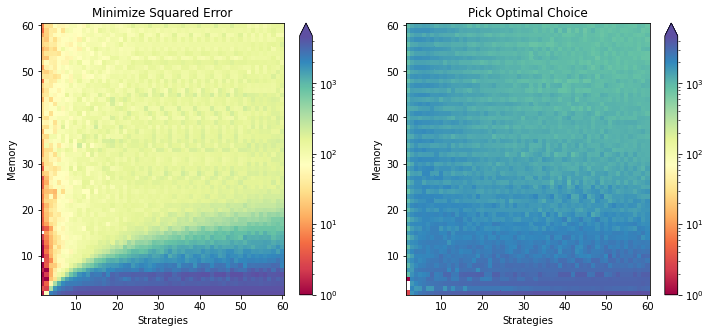

In [5]:
vmin = df["std"].max()
vmax = df["std"].max()
cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots(1,2,figsize=(12,5))

cf = "mse"

filtered = df[(df.choice == cf)  & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[0], extend='max')
ax[0].title.set_text("Minimize Squared Error")
ax[0].set_xlabel("Strategies")
ax[0].set_ylabel("Memory")

cf = "choice"
filtered = df[(df.choice == cf) & (df.memory <= 60)]

grpd = filtered.groupby(["strategies", "memory"])["std"].mean().reset_index()

grpd.sort_values(["strategies", "memory"], inplace=True)

X = grpd.strategies.values.reshape((59,59))
Y = grpd.memory.values.reshape((59,59))
Z = grpd["std"].values.reshape((59,59))

cmap = cm.get_cmap('Spectral')

pcm = ax[1].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=1, vmax=vmax),
                   cmap=cmap, shading='auto')
                   
fig.colorbar(pcm, ax=ax[1], extend='max')
ax[1].title.set_text("Pick Optimal Choice")
ax[1].set_xlabel("Strategies")
ax[1].set_ylabel("Memory")

# What happens when we run the simulation with some "good" choices

In [6]:
grpd = df.groupby(["strategies", "memory", "choice"])["std"].mean().reset_index().sort_values("std")

In [7]:
grpd.head(10)

,strategies,memory,choice,std
2,2,3.0,choice,0.000000
4,2,4.0,choice,0.000000
15,2,9.0,mse,0.000000
27,2,15.0,mse,0.000000
202,3,5.0,mse,0.235702
6,2,5.0,choice,0.433013
206,3,7.0,mse,0.471405
21,2,12.0,mse,0.498899
17,2,10.0,mse,0.724500
13,2,8.0,mse,0.769740


In [8]:
grpd[grpd.choice=="choice"].head(10)

,strategies,memory,choice,std
2,2,3.0,choice,0.000000
4,2,4.0,choice,0.000000
6,2,5.0,choice,0.433013
0,2,2.0,choice,2.772634
11429,59,99.0,choice,633.285317
10033,52,101.0,choice,633.509163
11427,59,98.0,choice,636.441232
11209,58,89.0,choice,637.635247
11425,59,97.0,choice,637.752235
10233,53,101.0,choice,640.590176


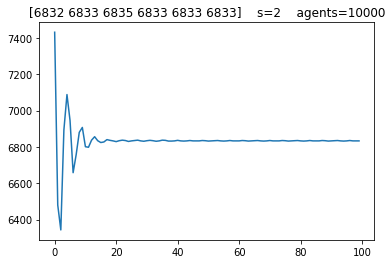

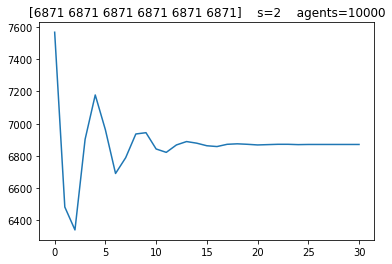

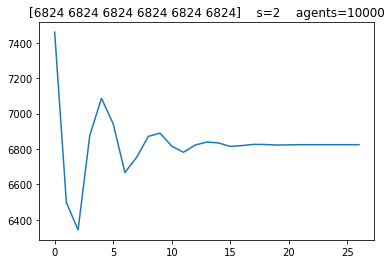

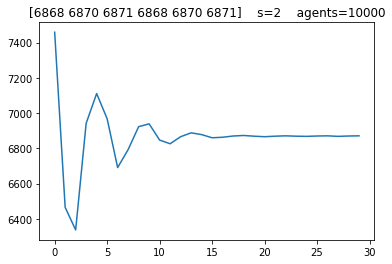

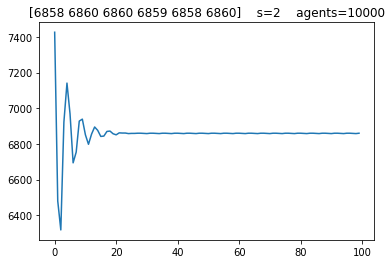

In [9]:
# why doesn't anything cross?
rng = np.random.default_rng(145)

agents = 10000
s = 2
memory = 3
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

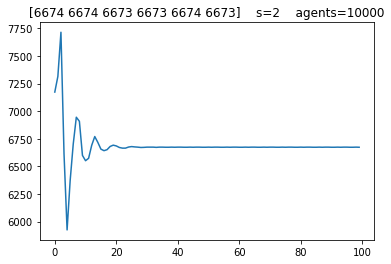

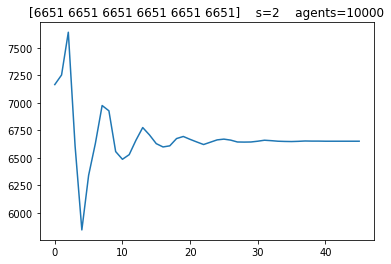

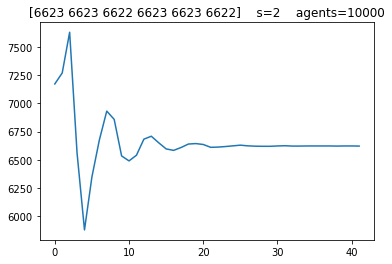

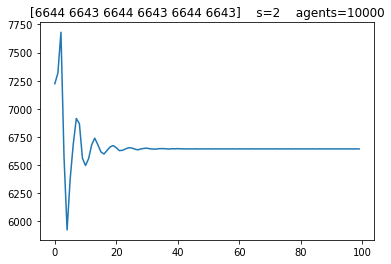

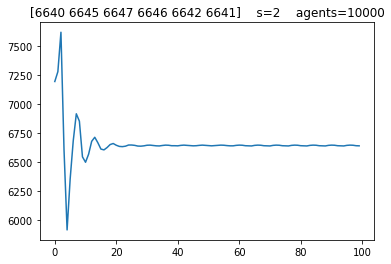

In [10]:
agents = 10000
s = 2
memory = 4
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

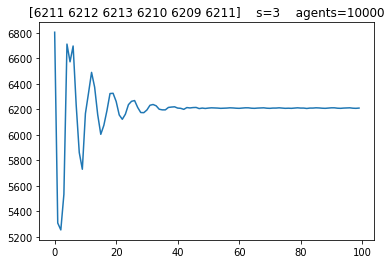

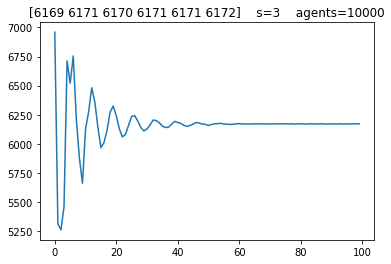

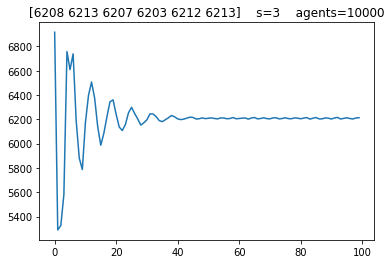

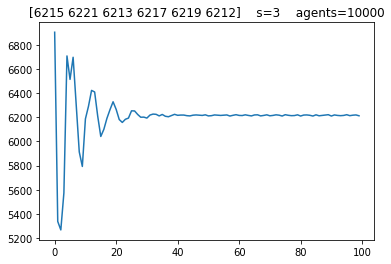

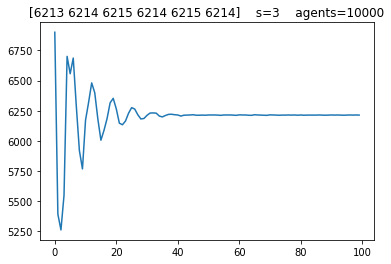

In [11]:
agents = 10000
s = 3
memory = 5
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

In [12]:
from EFBP import pick_optimal_choices

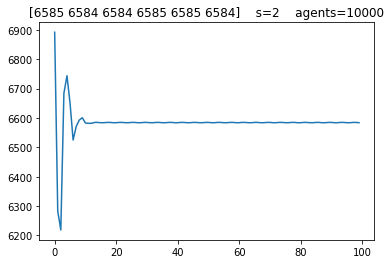

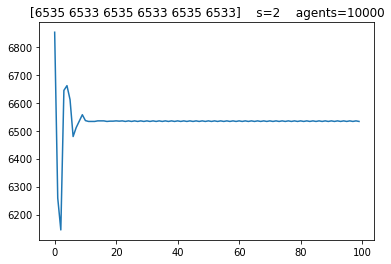

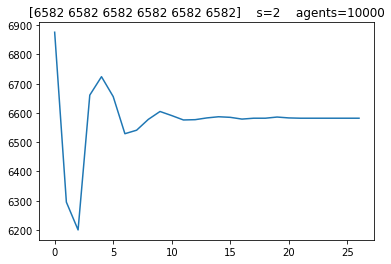

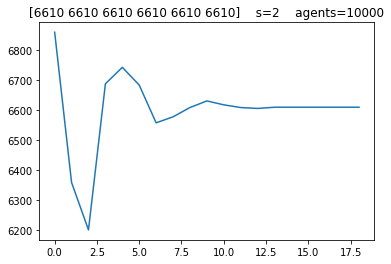

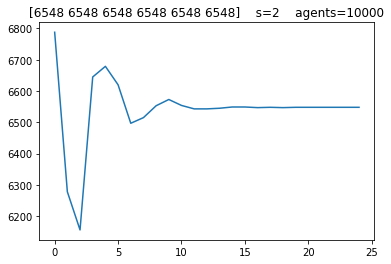

In [13]:
agents = 10000
s = 2
memory = 3
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

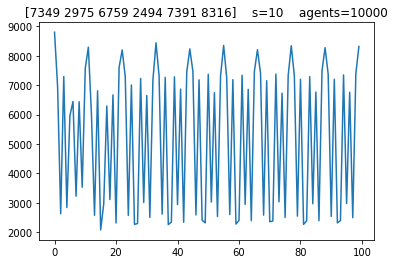

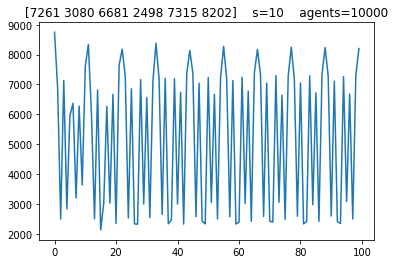

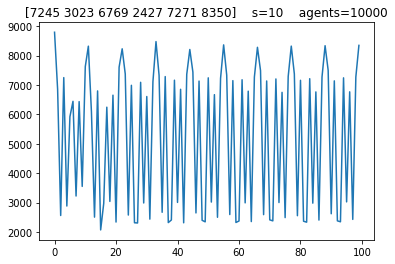

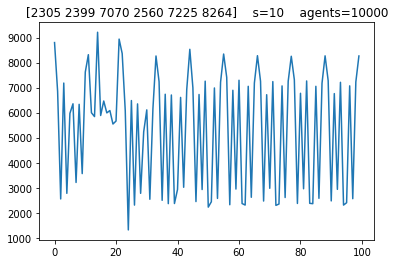

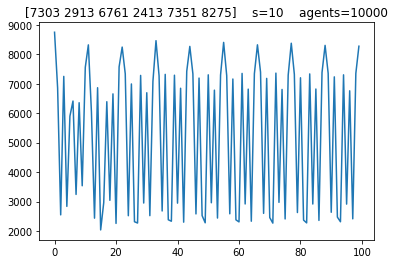

In [14]:
agents = 10000
s = 10
memory = 10
n_trials=5
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")

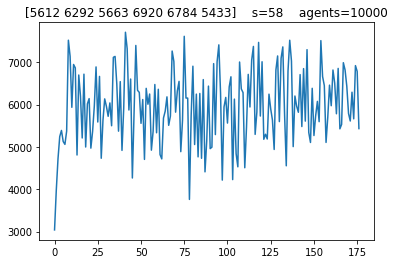

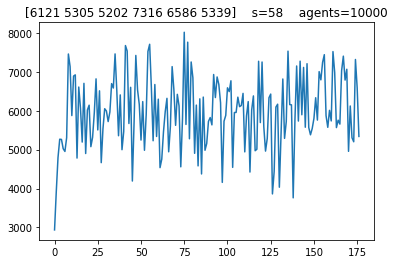

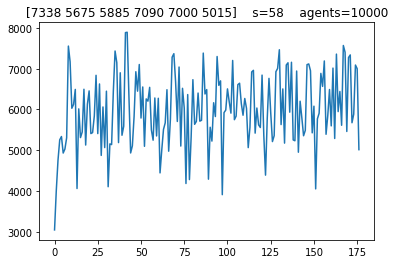

In [15]:
agents = 10000
s = 58
memory = 59
n_trials=3
n_iter = max(100, memory * 3)
threshold = 0.6

h = rng.choice(agents + 1, 2 * memory)

for _ in range(n_trials):
    sim = EFBPSim(
        memory=memory, 
        strategies=s,
        threshold=threshold  * agents,
        start=h, 
        n_iter=n_iter,
        agents=agents,
        distribution="uniform",
        best_strat_func=pick_optimal_choices,
        seed=rng.choice(100000)
    )

    plt.figure()
    plt.plot(sim.hist)
    _ = plt.title(f"{sim.hist[-6:]}    s={s}    agents={agents}")